In [ ]:
%matplotlib inline
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
current_dir = os.getcwd()

In [9]:
init_op=tf.global_variables_initializer()


def weight_variable(shape,name):
    return tf.Variable(tf.truncated_normal(shape=shape,stddev=0.1),name)
def bias_variable(shape,name):
    return tf.Variable(tf.constant(0.1,shape=shape),name)

x=tf.placeholder(tf.float32,shape=[None,784])
e_W_1=weight_variable([784,300],"e_W_1")
e_b_1=bias_variable([300],"e_b_1")
e_layer1=tf.nn.relu(tf.matmul(x,e_W_1)+e_b_1)
e_W_2=weight_variable([300,100],"e_W_2")
e_b_2=bias_variable([100],"e_b_2")
e_layer2=tf.nn.relu(tf.matmul(e_layer1,e_W_2)+e_b_2)
e_W_3=bias_variable([100,20],"e_W_3")
e_b_3=bias_variable([20],"e_b_3")

code_layer=tf.nn.relu(tf.matmul(e_layer2,e_W_3)+e_b_3)

d_W_1=weight_variable([20,100],"d_W_1")
d_b_1=bias_variable([100],"d_b_1")
d_layer1=tf.nn.relu(tf.matmul(code_layer,d_W_1)+d_b_1)
d_W_2=weight_variable([100,300],"d_W_2")
d_b_2=bias_variable([300],"d_b_2")
d_layer2=tf.nn.relu(tf.matmul(d_layer1,d_W_2)+d_b_2)
d_W_3=weight_variable([300,784],"d_W_3")
d_b_3=bias_variable([784],"d_b_3")
output_layer=tf.nn.relu(tf.matmul(d_layer2,d_W_3)+d_b_3)

#loss function
loss=tf.reduce_mean(tf.pow(output_layer-x,2))
optimizer=tf.train.RMSPropOptimizer(0.01).minimize(loss)
init_op=tf.global_variables_initializer()

sess=tf.InteractiveSession()
sess.run(init_op)
for i in range(20000):
    batch=mnist.train.next_batch(50)
    if i%100==0:
        print("step %d, loss %g"%(i,loss.eval(feed_dict={x:batch[0]})))
    optimizer.run(feed_dict={x:batch[0]})
    
print("final loss %g" % loss.eval(feed_dict={x:mnist.test.images}))


step 0, loss 0.629426
step 100, loss 0.0835595
step 200, loss 0.0664671
step 300, loss 0.0672531
step 400, loss 0.0642574
step 500, loss 0.0527206
step 600, loss 0.0543963
step 700, loss 0.0480503
step 800, loss 0.046638
step 900, loss 0.0344818
step 1000, loss 0.0370042
step 1100, loss 0.036529
step 1200, loss 0.0407868
step 1300, loss 0.0429876
step 1400, loss 0.0359411
step 1500, loss 0.0342042
step 1600, loss 0.0327583
step 1700, loss 0.0359244
step 1800, loss 0.0296948
step 1900, loss 0.034383
step 2000, loss 0.036049
step 2100, loss 0.0347027
step 2200, loss 0.0325686
step 2300, loss 0.0298946
step 2400, loss 0.0338443
step 2500, loss 0.0300798
step 2600, loss 0.0293948
step 2700, loss 0.0353989
step 2800, loss 0.0291375
step 2900, loss 0.0347468
step 3000, loss 0.0342655
step 3100, loss 0.032101
step 3200, loss 0.0302167
step 3300, loss 0.0315846
step 3400, loss 0.0316341
step 3500, loss 0.0360179
step 3600, loss 0.0324028
step 3700, loss 0.032573
step 3800, loss 0.031261
step 3

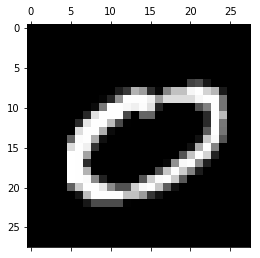

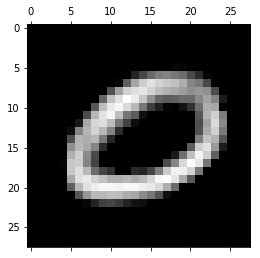

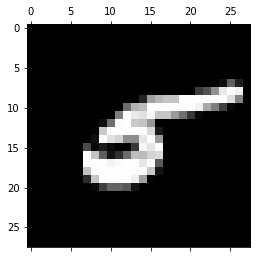

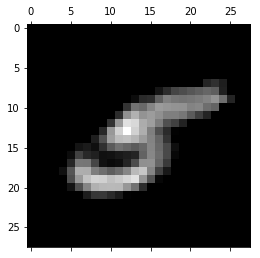

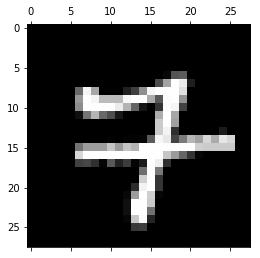

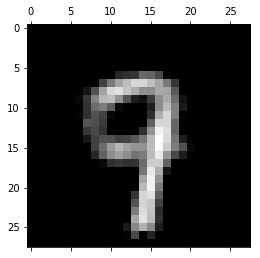

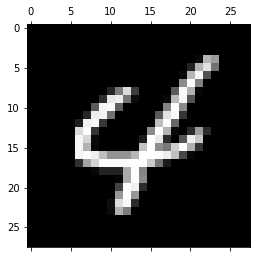

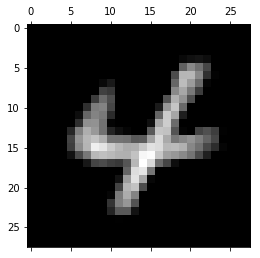

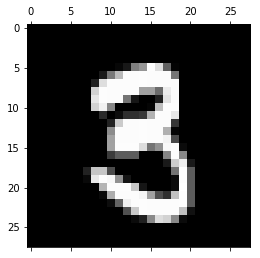

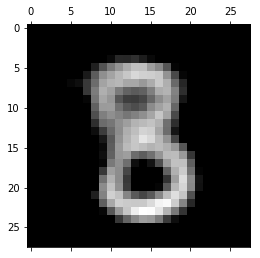

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

trainimg=mnist.train.images
trainlabel=mnist.train.labels
output_nd=output_layer.eval(feed_dict={x:mnist.train.images})

for i in [0,1,2,3,4]:
    curr_img=np.reshape(trainimg[i,:],(28,28))
    ae_img=np.reshape(output_nd[i,:],(28,28))
    curr_label=np.argmax(trainlabel[i,:])
    plt.matshow(curr_img,cmap=plt.get_cmap('gray'))
    plt.matshow(ae_img,cmap=plt.get_cmap('gray'))